<a href="https://colab.research.google.com/github/Ballardmallard/PQHS416_Spring_25/blob/main/Copy_of_HW6_Stockdale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

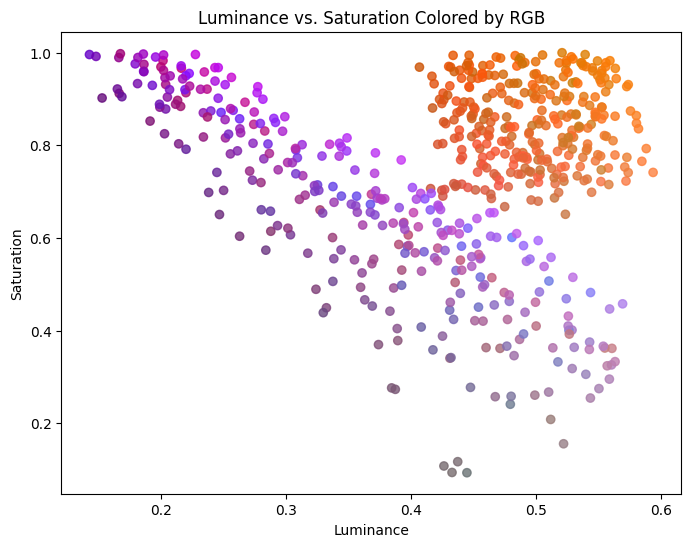

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Randomly generate some different colored dots (RGB values)
color1 = np.random.uniform(low=[200, 80, 0], high=[255, 130, 70], size=(300, 3)) / 255.0
color2 = np.random.uniform(low=[100, 0, 110], high=[200, 130, 255], size=(300, 3)) / 255.0
colors = np.concatenate((color1, color2), axis=0)

# Compute Luminance (Brightness)
luminance = 0.2126 * colors[:, 0] + 0.7152 * colors[:, 1] + 0.0722 * colors[:, 2]

# Compute Saturation
max_rgb = np.max(colors, axis=1)
min_rgb = np.min(colors, axis=1)
saturation = (max_rgb - min_rgb) / (max_rgb + 1e-6)  # Avoid division by zero

# Plot Luminance vs. Saturation with RGB coloring
plt.figure(figsize=(8, 6))
plt.scatter(luminance, saturation, c=colors, alpha=0.8)
plt.xlabel("Luminance")
plt.ylabel("Saturation")
plt.title("Luminance vs. Saturation Colored by RGB")
plt.show()

In [8]:
# Create a dataset for training and reserve a dataset for validation
color_data = np.column_stack((luminance, saturation))

# Create an array of shuffled indices & apply indices to both features and labels
num_samples = color_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)
color_data = color_data[indices]
labels = np.concatenate([np.zeros(300), np.ones(300)])[indices]

# Normalize features (zero mean, unit variance)
mean = np.mean(color_data, axis=0)
std = np.std(color_data, axis=0)
color_data_normalized = (color_data - mean) / std

# Split into 70% training and 30% testing
train_size = int(0.7 * num_samples)
X_train, X_validation = color_data_normalized[:train_size], color_data_normalized[train_size:]
y_train, y_validation = labels[:train_size], labels[train_size:]

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9549 - loss: 0.1222 - val_accuracy: 0.9444 - val_loss: 0.1187
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9427 - loss: 0.1207 - val_accuracy: 0.9444 - val_loss: 0.1176
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9359 - loss: 0.1238 - val_accuracy: 0.9556 - val_loss: 0.1165
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9578 - loss: 0.1177 - val_accuracy: 0.9556 - val_loss: 0.1155
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9514 - loss: 0.1183 - val_accuracy: 0.9556 - val_loss: 0.1144
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9793 - loss: 0.1141 - val_accuracy: 0.9611 - val_loss: 0.1134
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9675 - loss: 0.1142 - val_accuracy: 0.9722 - val_loss: 0.1124
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9429 - loss: 0.1184 - val_accuracy: 0.9722 - val_loss: 0.11

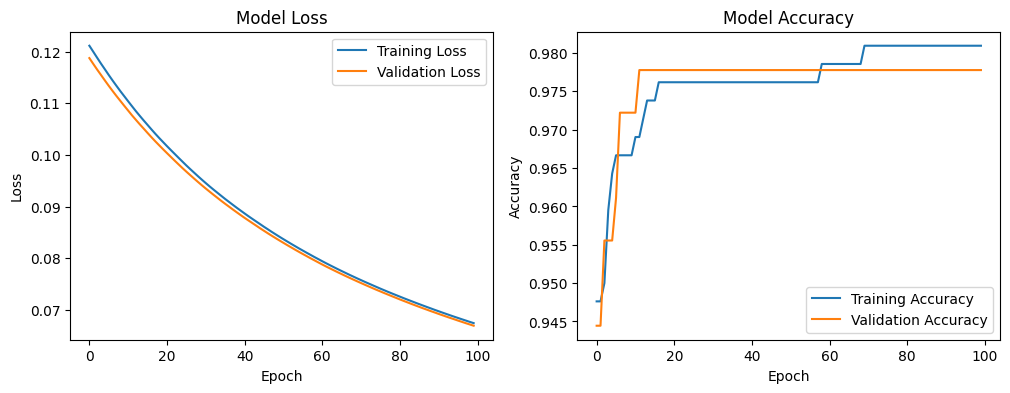

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


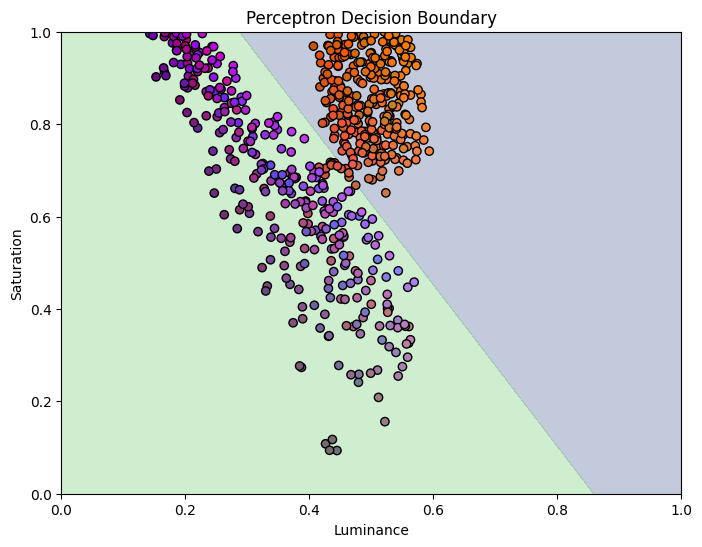

In [9]:
# Create the model
import keras
from keras import models
from keras import layers
model = keras.Sequential([keras.layers.Dense(1, activation="sigmoid")])

# Compile the model
model.compile(
    optimizer="sgd",
    loss="mean_squared_error",
    metrics=["accuracy"]
)

# training the model, setting the epochs and batch size
# restore_best_weights set to true
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=50,
    validation_data=(X_validation, y_validation),
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# evaluating the model and print results
loss_and_metrics = model.evaluate(X_validation, y_validation, batch_size=128)
print(loss_and_metrics)

# making a plot of training history to assess/guage how many epochs are needed
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ploting the linear decision boundary for MSE loss method
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
# Normalize the grid points using the same mean and std as the training data
grid_normalized = (grid - mean) / std
preds = model.predict(grid_normalized).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(luminance, saturation, c=colors, edgecolor="k")
plt.xlabel("Luminance")
plt.ylabel("Saturation")
plt.title("Perceptron Decision Boundary")
plt.show()

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - binary_accuracy: 0.4452 - loss: 1.0899 - val_binary_accuracy: 0.4500 - val_loss: 1.0198
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4533 - loss: 1.0525 - val_binary_accuracy: 0.4667 - val_loss: 0.9951
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4658 - loss: 1.0099 - val_binary_accuracy: 0.4778 - val_loss: 0.9707
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4647 - loss: 1.0032 - val_binary_accuracy: 0.5000 - val_loss: 0.9473
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4767 - loss: 0.9819 - val_binary_accuracy: 0.5056 - val_loss: 0.9249
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4694 - loss: 0.9719 - val_binary_accuracy: 0.5278 - val_loss: 0.9023
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4855 - loss: 0.9861 - val_binary_accuracy: 0.5278 - val_loss: 0.8809
Epoch 8/100
9/9 ━━━━

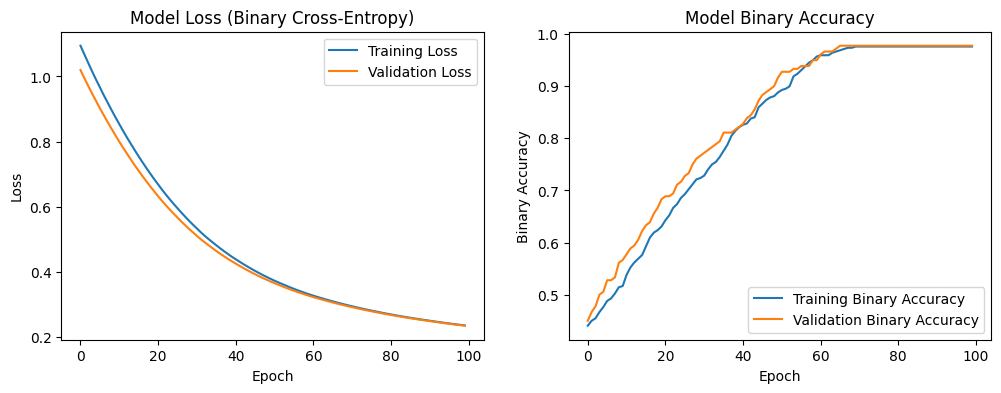

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


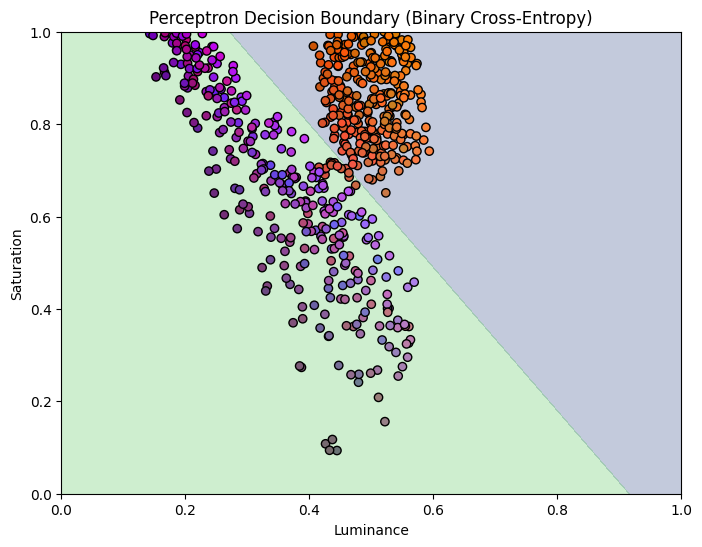

In [10]:
# Bulding the binary cross entropy model
# Importing keras again
import keras
from keras import models
from keras import layers
model = keras.Sequential([keras.layers.Dense(1, activation="sigmoid")])

# Compile the model with binary_crossentropy as loss metric
model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",  # Use binary cross-entropy for binary classification
    metrics=["binary_accuracy"]  # Track binary accuracy as a metric
)

# training the model
# setting epochs and batch size
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=50,
    validation_data=(X_validation, y_validation),
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# evaluating the model
loss_and_metrics = model.evaluate(X_validation, y_validation, batch_size=128)
print("Validation Loss and Binary Accuracy:", loss_and_metrics)

# Plotting training history (loss and binary accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Binary Cross-Entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Model Binary Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
# Normalize the grid points using the same mean and std as the training data
grid_normalized = (grid - mean) / std
preds = model.predict(grid_normalized).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(luminance, saturation, c=colors, edgecolor="k")
plt.xlabel("Luminance")
plt.ylabel("Saturation")
plt.title("Perceptron Decision Boundary (Binary Cross-Entropy)")
plt.show()

Evaluting the two approaches, MSE vs Binary-Cross Entropy, over 100 epochs, we can note a few key observations. Both models reached a similar model accuracy and model loss. After trying several different iterations, in general it seems the binary cross entropy was better at achieving a good accuracy (>97%) with relatively few epochs. Although this was not always the case. On my most recent trial...the MSE actually performed better, with quick improvements over just 10-15 eopchs. Overall, for a binary classifcation problem, both methods appear to work fine. MSE is a simple linear regression method, so obvious limitations will be any type of complex decision boundary between two groups (i.e. curves necessitating splines or polynomial fits). In keeping with this, I noted that the more difficult the boundary or blurred the clustering of colors (when I would run more trials), the wosre the MSE would perform. Similarly, When limiting training to just 10 epochs, this efficiency advantage becomes even more pronounced (on average, though not always).

In [6]:
import pickle
import numpy as np
from tensorflow.keras.layers import TextVectorization

# Load the pickle dataset
with open("BAD_dataset.pkl", "rb") as f:
    data = pickle.load(f)

train_texts = data['train_texts']
train_labels = data['train_labels']
test_texts = data['test_texts']
test_labels = data['test_labels']
print("Dataset loaded from BAD_dataset.pkl")

# checking the dataset and code to see if train_text and train_label are working
for i in range(1, 3):
    print(f"Example {i}:")
    print("Text:", train_texts[i])
    print("Label:", train_labels[i])
    print()

# Using the TextVectorization layer method
vectorize_layer = TextVectorization(
    max_tokens=10000,
    output_mode='multi_hot'
)

vectorize_layer.adapt(train_texts)

train_multi_hot_layer = vectorize_layer(train_texts).numpy()
test_multi_hot_layer = vectorize_layer(test_texts).numpy()

# calling the first example from the train_text data
print("Sample text:", train_texts[0])
print("Multi-hot encoding shape:", train_multi_hot_layer[0].shape)
print("Number of non-zero elements:", np.sum(train_multi_hot_layer[0]))

# seeing which words are encoded, not sure how dsm is stored
vocab = vectorize_layer.get_vocabulary()
print("Vocabulary size:", len(vocab))
print("First 10 words in vocabulary:", vocab[:10])

Dataset loaded from BAD_dataset.pkl
Example 1:
Text: Hobbies are expensive.  Only rich people can afford hobbies.
Label: 0

Example 2:
Text: I do agree. I am not sure what the dsm is though. I'm going to college in the fall.
Label: 1

Sample text: Yeah, they dont show to me that they love me
Multi-hot encoding shape: (10000,)
Number of non-zero elements: 8
Vocabulary size: 10000
First 10 words in vocabulary: ['[UNK]', 'i', 'you', 'to', 'do', 'a', 'about', 'the', 'think', 'that']


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6437 - loss: 0.6051 - val_accuracy: 0.7318 - val_loss: 0.5230
Epoch 2/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7299 - loss: 0.5264 - val_accuracy: 0.7368 - val_loss: 0.5061
Epoch 3/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7529 - loss: 0.4933 - val_accuracy: 0.7403 - val_loss: 0.5008
Epoch 4/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7680 - loss: 0.4738 - val_accuracy: 0.7397 - val_loss: 0.5014
Epoch 5/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7759 - loss: 0.4581 - val_accuracy: 0.7449 - val_loss: 0.5038
Epoch 6/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7826 - loss: 0.4397 - val_accuracy: 0.7415 - val_loss: 0.5130
Epoch 7/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7908 - loss: 0.4253 - val_accuracy: 0.7423 - val_loss: 0.5195
Epoch 8/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7977 - loss: 0.4110 - 

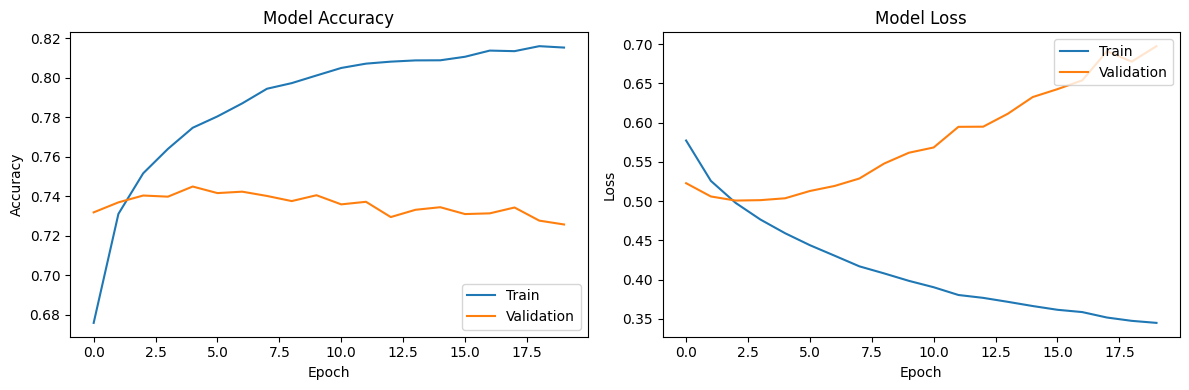

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# using TextVectorization layer output from cell above
X_train = train_multi_hot_layer
X_test = test_multi_hot_layer
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# create the model
model = Sequential([
    # input layer with 10,000 input features (from our class discussion on vocabulary size)
    Dense(16, activation='relu', input_shape=(10000,)),
    Dropout(0.5),  # Add dropout for regularization
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (0=good, 1=bad)
])

# compile the model using binary cross entropy as the loss
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# evaluating model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


# printing some examples first to test
for i in range(5):
    print(f"Example {i}:")
    print(f"Text: {test_texts[i]}")
    print(f"Actual Label: {test_labels[i]} ({'Bad' if test_labels[i] == 1 else 'Good'})")
    print(f"Predicted: {predicted_classes[i]} ({'Bad' if predicted_classes[i] == 1 else 'Good'})")
    print(f"Confidence: {predictions[i][0]:.4f}")
    print()

# plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()